# Linear Discriminant Analysis (LDA)

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Loading Data

We will be using the [iris dataset](https://www.kaggle.com/datasets/arshid/iris-flower-dataset/data)

In [107]:
# Loading our dataset using pandas
df = pd.read_csv("../data/iris.csv")

# Splitting data
outcomes = df["species"].map({species: i for i, species in enumerate(df["species"].unique())}).to_numpy()
data = df.drop(["species"], axis=1).to_numpy()

# Normilizing data
# data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

print(f"Mean of each column: {np.mean(data, axis=0)}\n")
print(f"Standard deviation of each column: {np.std(data, axis=0)}")

Mean of each column: [5.84333333 3.054      3.75866667 1.19866667]

Standard deviation of each column: [0.82530129 0.43214658 1.75852918 0.76061262]


In [108]:
def lda(X, y, components=2):
    class_means = [np.mean(X[y == i], axis=0) for i in np.unique(y)]

    # Scatter matrices
    SW = np.zeros((X.shape[1], X.shape[1]))
    SB = np.zeros((X.shape[1], X.shape[1]))

    for i in np.unique(y):
        class_samples = X[y == i]
        class_mean_diff = class_samples - class_means[i]

        SW += np.dot(class_mean_diff.T, class_mean_diff)

        mean_diff = class_means[i] - np.mean(X, axis=0)
        SB += len(class_samples) * np.outer(mean_diff, mean_diff)

    M = np.linalg.inv(SW).dot(SB)

    # Compute eigenvalues and eignenvectors of M
    eigenvalues, eigenvectors = np.linalg.eig(M)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    return eigenvectors[:, :components]

In [109]:
def project_onto_components(data, components):
    return np.dot(data, components)

In [110]:
components = lda(data, outcomes, components=2)
projected_data = project_onto_components(data, components)

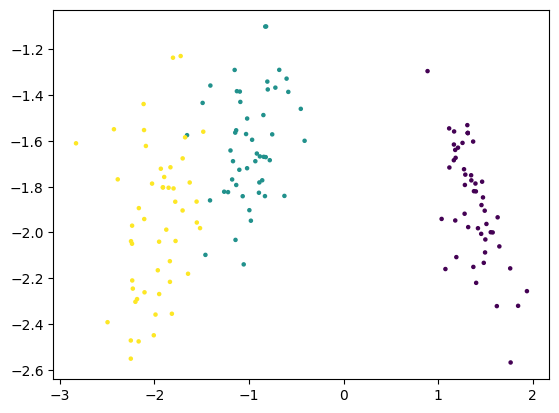

In [111]:
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=outcomes, s=5)
plt.show()